# Exploratory Data Analysis and Logistic Regression

## Titanic dataset from kaggle

## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The data

In [6]:
train = pd.read_csv('titanic.csv')

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data analysis

## Missing data

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
## for finding missing values we are now using seaborn heatmap method

<AxesSubplot:>

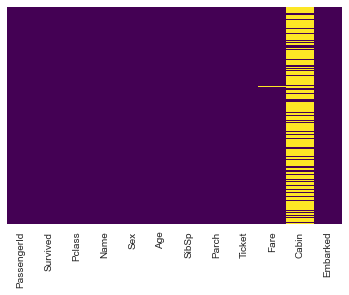

In [15]:
sns.heatmap(train.isnull(),yticklabels= False,cbar= False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

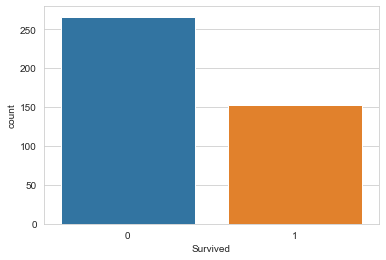

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

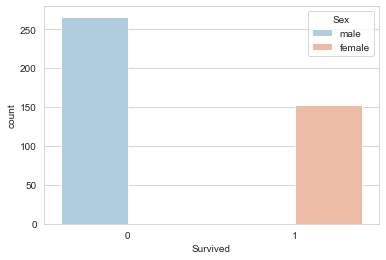

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data = train,palette= 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

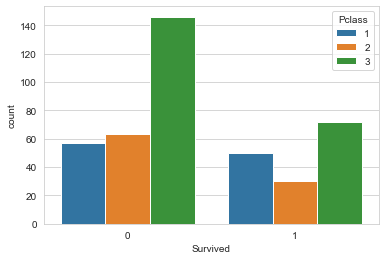

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data = train)

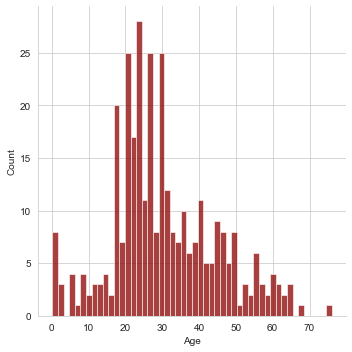

In [34]:
sns.displot(train['Age'].dropna(),kde=False, color = 'darkred',bins=50)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

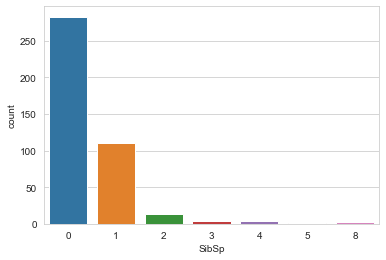

In [37]:
sns.countplot(x='SibSp',data=train)

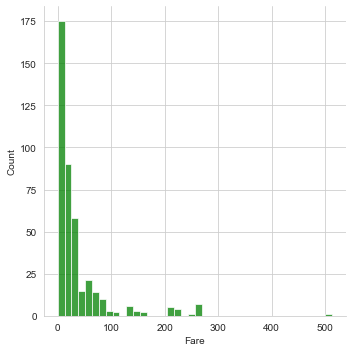

In [46]:
sns.displot(train['Fare'],bins=40,color='green')

# Data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

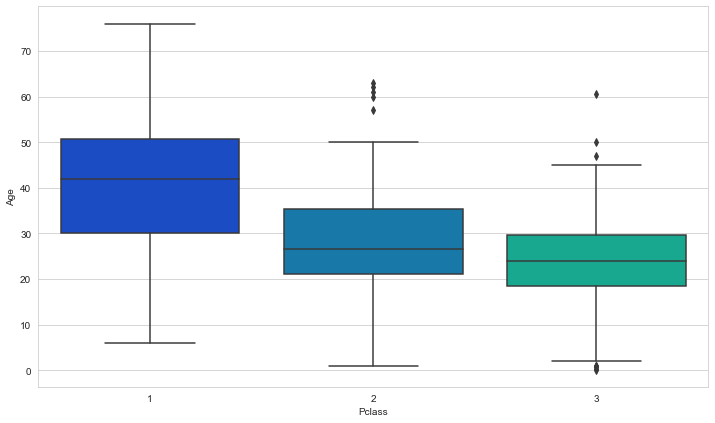

In [49]:
plt.figure(figsize =(12,7)) # enlarge the figure
sns.boxplot(x= "Pclass",y='Age',data=train,palette ='winter')

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [53]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis =1)

<AxesSubplot:>

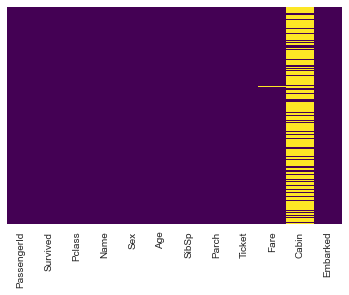

In [56]:
sns.heatmap(train.isnull(),yticklabels= False,cbar= False, cmap='viridis')

In [57]:
## let's drop the cabin column and the row in embarked that is NaN


In [58]:
train.drop('Cabin',axis=1,inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<AxesSubplot:>

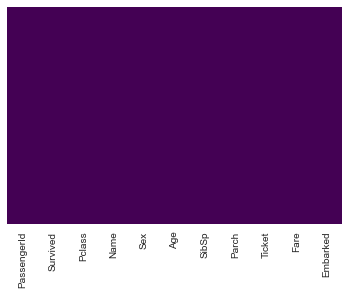

In [71]:
sns.heatmap(train.isnull(),yticklabels= False,cbar= False, cmap='viridis')

In [72]:

## for the missing value in Fare
mean_Fare = train['Fare'].mean()
train['Fare'].fillna(value=mean_Fare,inplace=True)

# converting Categorical features


In [74]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [75]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first= True)

In [77]:
train.drop(['Sex','Embarked','Name','Ticket'],axis= True,inplace= True)

In [79]:
train = pd.concat([train,sex,embark],axis=1)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


# BUilding a Logistic Regression model

In [81]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [111]:
train['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=300)

# Training and Predicting


In [89]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression(solver='liblinear', max_iter=700)
logmodel.fit(X_train,Y_train)

LogisticRegression(max_iter=700, solver='liblinear')

In [116]:
predictions = logmodel.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
accuracy = confusion_matrix(Y_test,predictions)

In [119]:
accuracy

array([[79,  0],
       [ 0, 47]])

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy = accuracy_score(Y_test,predictions)
accuracy

1.0

In [122]:
predictions


array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0])